In [19]:
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
img  = cv2.imread('testimg/binny.jpg') #* opencv function to read image
img.shape

(1944, 2592, 3)

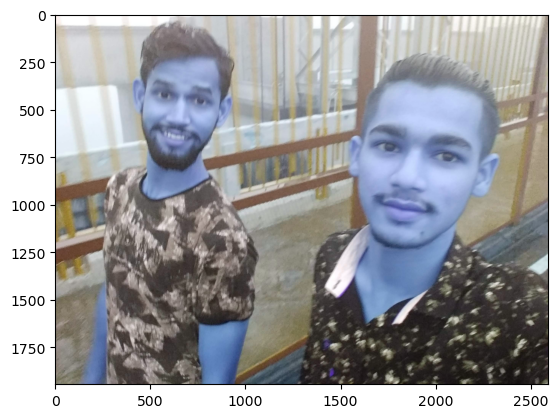

In [21]:
plt.imshow(img)

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #* for converting image to grayscale
gray.shape #* returns a 2-d image array without rgb

(1944, 2592)

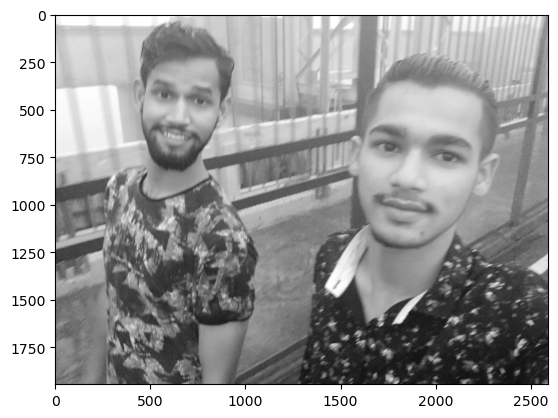

In [23]:
plt.imshow(gray, cmap="gray")

In [24]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_alt.xml') #* importing face xml
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye_tree_eyeglasses.xml')#* importing eye xml

faces = face_cascade.detectMultiScale(gray, 1.3, 5) #* detecting faces in 'gray' image
faces

array([[ 384,  225,  539,  539],
       [1499,  395,  792,  792]], dtype=int32)

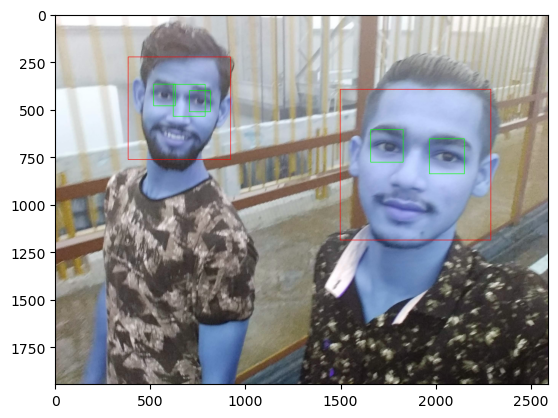

In [25]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #* highlighting face with red rectangle
    roi_gray = gray[y:y+h, x:x+w] #* extracting face(region of interest) only from gray image for eye detection
    roi_color = face_img[y:y+h, x:x+w] #* extracting face(region of interest) from colored image
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(face_img, cmap='gray')


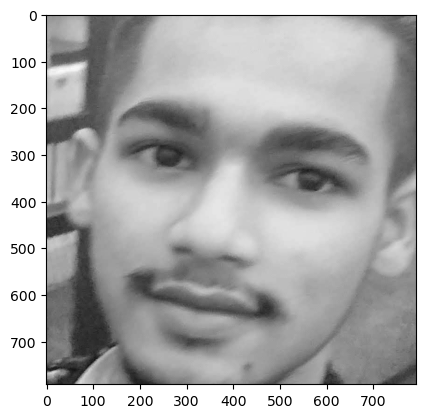

In [26]:
plt.imshow(roi_gray, cmap='gray')

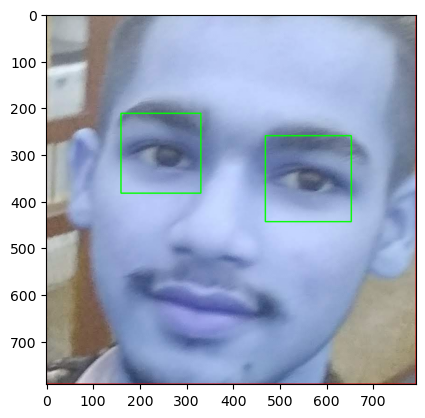

In [27]:
plt.imshow(roi_color, cmap='gray')

In [36]:
def get_cropped_img_if_2_eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    roi_color=[]

    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) > 0:
           roi_color.append(img[y:y+h, x:x+w]) 
    return(roi_color)
        

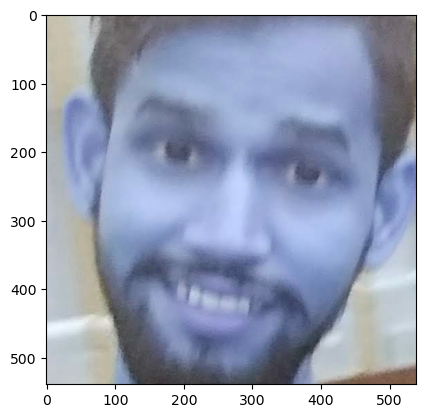

In [29]:
cropped_image = get_cropped_img_if_2_eyes('testimg/binny.jpg')
plt.imshow(cropped_image)
plt.show()


In [30]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [39]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs
    

['./dataset/aayushi',
 './dataset/abhishek',
 './dataset/binod',
 './dataset/vandana',
 './dataset/cropped']

In [40]:
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [43]:
cropped_image_dirs = [] #* contains the paths to the cropped images

for img_dir in img_dirs:
    count = 1
    friend_name = img_dir.split('/')[-1] #* creating directories with friend's name as name and containing cropped images
    print(friend_name)
    

    
    for entry in os.scandir(img_dir): #* iterating over each image file inside img_dir
        roi_color = get_cropped_img_if_2_eyes(entry.path) #* saving output of function into roi_color
        if len(roi_color) > 0:
            cropped_folder = path_to_cr_data + friend_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            
            for i,cropped_image in enumerate(roi_color):
                cropped_file_name = friend_name + str(i) + str(count) + ".png" #* eg binny1.png, binny2.png
                cropped_file_path = cropped_folder + "/" + cropped_file_name 
                cv2.imwrite(cropped_file_path, cropped_image) #* saving the image in roi_color to cropped folder
            
            
            count += 1    

aayushi
abhishek
Generating cropped images in folder:  ./dataset/cropped/abhishek
binod
Generating cropped images in folder:  ./dataset/cropped/binod
vandana
Generating cropped images in folder:  ./dataset/cropped/vandana
cropped


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
